<a href="https://colab.research.google.com/github/Olekowalski/AI_MED_Recruitment/blob/main/AleksanderKowalski/AI_in_medicine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
# Load the dataset from the specified CSV file into a pandas DataFrame
df=pd.read_csv('task_data.csv')
df.head()

,ID,Cardiomegaly,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,1,0,172,405,0.424691,1682.360871,3153.671880,-638.531109,-0.304239,68.81860,0.213446,679.487369,24898,75419
1,2,1,159,391,0.406650,1526.660960,5102.159054,-889.678405,-0.539387,73.92564,0.203652,788.658942,29851,94494
2,5,0,208,400,0.520000,2465.903392,5376.834707,-1755.344699,-0.371163,69.33974,0.320787,862.322937,33653,66666
3,7,1,226,435,0.519540,2509.063593,6129.821270,-1025.079806,-0.419123,84.14868,0.317545,906.724959,42018,82596
4,8,1,211,420,0.502381,2368.770135,5441.767075,-1493.040062,-0.393442,73.78347,0.263542,864.239678,35346,85631


In [5]:
# Extract the target variable 'Cardiomegaly' and assign it to the variable y
y=df['Cardiomegaly']
y

,Cardiomegaly
0,0
1,1
2,0
3,1
4,1
5,1
6,1
7,1
8,0
9,1


In [6]:
# Extract the features (all columns except 'ID' and 'Cardiomegaly') and assign them to the variable X
X=df.iloc[:,2:]
X

,Heart width,Lung width,CTR - Cardiothoracic Ratio,xx,yy,xy,normalized_diff,Inscribed circle radius,Polygon Area Ratio,Heart perimeter,Heart area,Lung area
0,172,405,0.424691,1682.360871,3153.671880,-638.531109,-0.304239,68.81860,0.213446,679.487369,24898,75419
1,159,391,0.406650,1526.660960,5102.159054,-889.678405,-0.539387,73.92564,0.203652,788.658942,29851,94494
2,208,400,0.520000,2465.903392,5376.834707,-1755.344699,-0.371163,69.33974,0.320787,862.322937,33653,66666
3,226,435,0.519540,2509.063593,6129.821270,-1025.079806,-0.419123,84.14868,0.317545,906.724959,42018,82596
4,211,420,0.502381,2368.770135,5441.767075,-1493.040062,-0.393442,73.78347,0.263542,864.239678,35346,85631
5,222,405,0.548148,2351.057355,8378.677729,-812.061371,-0.561768,83.86298,0.328101,1001.068103,46381,92755
6,202,498,0.405622,2251.879460,4467.406612,-511.955541,-0.329727,84.72308,0.209396,808.298550,35417,116542
7,228,474,0.481013,2971.936804,3971.943088,-885.822012,-0.144013,83.73769,0.242418,821.955404,36716,97325
8,176,449,0.391982,1833.841218,3709.724540,-831.472858,-0.338389,73.40981,0.181388,727.972650,27939,99656
9,223,473,0.471459,2412.707474,6169.769803,-880.450924,-0.437760,76.41989,0.261665,922.925968,38162,105442


In [7]:
# Split the data into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [8]:
# Initialize the DecisionTreeClassifier with the best parameters found by GridSearchCV
clf = DecisionTreeClassifier(
    max_depth=5,
    criterion='log_loss',
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight=None
)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Perform cross-validation on the training data and round the scores
cv_score = np.round(cross_val_score(clf, X_train, y_train), 2)


print(f"Scores of training data cross-validation (each fold):")
list(map(print, cv_score))
print(f"\nCross-validation mean score: {np.mean(cv_score):.3}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")


Scores of training data cross-validation (each fold):
1.0
0.67
0.83
0.83
0.8

Cross-validation mean score: 0.826
Standard deviation of CV score: 0.105


In [9]:


# Scale the training and test data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Define the parameter grid for the DecisionTreeClassifier
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}


grid_search_tree = GridSearchCV(clf, param_grid_tree, cv=5, scoring='f1')

# Fit GridSearchCV to the scaled training data to find the best parameters
grid_search_tree.fit(X_scaled_train, y_train)


print("Best parameters:")
print(grid_search_tree.best_params_)
print("\nBest F1 score:")
print(grid_search_tree.best_score_)

Best parameters:
{'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Best F1 score:
0.9111111111111111


In [13]:
# Initialize the DecisionTreeClassifier with the best parameters found by GridSearchCV
clf = DecisionTreeClassifier(
    max_depth=5,
    criterion='gini',
    min_samples_split=5,
    min_samples_leaf=1,
    class_weight=None
)

# Train the classifier on the training data
clf.fit(X_scaled_train, y_train)

# Perform cross-validation on the training data and round the scores
cv_score = np.round(cross_val_score(clf, X_scaled_train, y_train), 2)


print(f"Scores of training data cross-validation (each fold):")
list(map(print, cv_score))
print(f"\nCross-validation mean score: {np.mean(cv_score):.3}")
print(f"Standard deviation of CV score: {np.std(cv_score):.3f}")

# Make predictions on the test data
y_pred=clf.predict(X_scaled_test)

Scores of training data cross-validation (each fold):
1.0
0.83
0.83
0.83
0.6

Cross-validation mean score: 0.818
Standard deviation of CV score: 0.127


In [14]:
# Print the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.83      0.83      0.83         6

    accuracy                           0.75         8
   macro avg       0.67      0.67      0.67         8
weighted avg       0.75      0.75      0.75         8



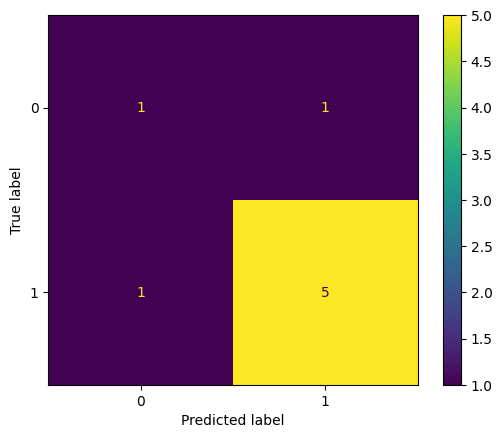

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()